In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from xgboost.sklearn import XGBClassifier

from NiaPy.algorithms.basic import GreyWolfOptimizer, GeneticAlgorithm, FireflyAlgorithm, ParticleSwarmOptimization, BatAlgorithm
from NiaPy.task import Task, StoppingTask, OptimizationType
from NiaPy.benchmarks import Benchmark

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from pprint import pprint
import time

model = "C:/Users/miska/OneDrive/Dokumenty/pripoc-projekt/model/"

In [2]:
social = pd.read_csv(model + 'social_model_all_features.csv', sep = ',')
text = pd.read_csv(model + 'text_model_all_features.csv', sep = ',')

In [3]:
# we are going to drop the label from the text models, because we have it in the social ones
text = text.drop(['label'], axis=1)

# Model with all social and all text features

In [4]:
combined = social.merge(text, on='userId')

In [5]:
combined

,userId,louvain,labelPropagation,triangles,clustCoeff,scc,unionFind,betweeness_out,betweeness_both,closeness,...,http://www.addictinginfo.org,http://www.chicksontheright.com,http://www.ifyouonlynews.com,http://www.opposingviews.com,http://www.proudcons.com,http://www.thepoliticalinsider.com,http://www.yesimright.com,https://goo.gl,https://ihavethetruth.com,https://www.washingtonpost.com
0,1,15169,0,2,333,0,0,0,27,368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,9809,32,292,69,1,0,49276,4786,388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,15169,21,0,0,2,0,0,0,321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,10574,32,10780,31,1,0,315057,55039,393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,15169,9238,0,0,4,0,227,215,296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15252,15253,15169,32,42,166,1,0,150,7001,434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15253,15254,10574,32,7,106,1,0,5448,280,345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15254,15255,15169,15285,4,400,15254,0,0,5,380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15255,15256,15169,82,7,194,1,0,802,117,387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting into train and test

In [6]:
# excluding some features from being in the 'X'
X_columns = combined.columns.difference(['userId', 'label', 'followingList', 'followersList', 'source'])

X = combined[X_columns] 
y = combined['label']

number_of_cols = len(X_columns)
print(number_of_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)
X_train

88


,authors_len,avg_authors_len,avg_numbers_cnt_text,avg_numbers_cnt_title,avg_text_len,avg_text_special,avg_title_len,avg_title_special,avg_wcount_text,avg_wcount_title,...,special_text,special_title,text_len,title_len,triangles,unionFind,uppercount_text,uppercount_title,wordcount_text,wordcount_title
777,6,6.0,45.0,0.0,19923.0,12.0,63.0,0.0,3400.0,11.0,...,12,0,19923,63,235,0,482,12,3400,11
11042,7,7.0,0.0,0.0,2236.0,3.0,52.0,0.0,379.0,8.0,...,3,0,2236,52,16,0,79,8,379,8
12724,2,2.0,1.0,0.0,1024.0,0.0,73.0,0.0,174.0,12.0,...,0,0,1024,73,16,0,45,3,174,12
6138,0,0.0,3.0,0.0,2028.0,2.0,57.0,0.0,378.0,11.0,...,2,0,2028,57,27,0,60,14,378,11
4019,1,1.0,0.0,0.0,1986.0,0.0,70.0,0.0,326.0,12.0,...,0,0,1986,70,570,0,38,12,326,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,0.0,9.5,0.0,1436.5,6.0,54.0,0.0,260.5,9.0,...,12,0,2873,108,229,0,115,21,521,18
13418,2,2.0,8.0,0.0,1627.0,1.0,68.0,0.0,261.0,11.0,...,1,0,1627,68,8,0,60,3,261,11
5390,3,3.0,19.0,0.0,3346.0,1.0,60.0,0.0,532.0,9.0,...,1,0,3346,60,0,0,129,9,532,9
860,4,4.0,20.0,0.0,4150.0,7.0,66.0,0.0,688.0,10.0,...,7,0,4150,66,0,0,163,12,688,10


## XG Boost Classifier

In [7]:
def get_f1macro_xgbclassif(X__train=X_train, X__test = X_test):
    xg = XGBClassifier()
    xg.fit(X__train,y_train)
    y_pred = xg.predict(X__test)
    num_of_features = X__train.shape[1]
    return num_of_features, f1_score(y_test, y_pred, average='macro')

## all features

In [8]:
# creating list of tuples with number of features and their f1-score
all_scores = []

In [9]:
num, f1 = get_f1macro_xgbclassif()
all_scores.append((num, f1, 'all'))
print(num, 'features, f1 =', f1)

88 features, f1 = 0.9982508762334465


# Optimizer and Benchmark for Feature Selection

In [10]:
def get_scores_under_threshold(values, thr):
    indexes = []
    for idx, val in enumerate(values):
        if val < thr:
            indexes.append(idx)
    return indexes

In [11]:
class FeatureSelectionBenchmark(Benchmark):
    def __init__(self, threshold):
        self.Lower = 0
        self.Upper = 1
        self.threshold = threshold
        super().__init__(self.Lower, self.Upper)

    def function(self):
        def evaluate(D, solution):
            selected_indexes = get_scores_under_threshold(solution, self.threshold)
            selected_features = len(selected_indexes)
            all_features = number_of_cols
            
            X_train_new = X_train.iloc[:, selected_indexes]
            X_test_new = X_test.iloc[:, selected_indexes]
            
            alpha = 0.99
            beta = 0.01
                                
            if X_train_new.shape[1] > 0:  # Check if no features were selected
                classifier = XGBClassifier()
                classifier.fit(X_train_new, y_train)
                y_pred = classifier.predict(X_test_new)
                # calcutaing the fitness function
                f1 = f1_score(y_test, y_pred, average='macro')
                classif_part = alpha * f1
                features_part = beta * ((abs(all_features - selected_features)) / selected_features)
                fitness = classif_part + features_part
                # print(classif_part, features_part, ' = ', selected_features, ' features - ', (1 - fitness))
                inverted_fitness = (1 - fitness)
                return inverted_fitness
            else:
                return math.inf
        return evaluate

In [12]:
class FeatureSelectionOptimizer():
    def __init__(self, optimizer, benchmark = FeatureSelectionBenchmark, 
                 threshold = 0.5, num_iter = 5, num_gen = 50, num_eval = 50):
        self.benchmark = benchmark
        self.optimizer = optimizer
        self.threshold = threshold
        self.num_iter = num_iter
        self.num_gen = num_gen
        self.num_eval = num_eval

    def run(self):
        # D (int): Dimension of the problem. - the number of features
        # nFES (int): Maximum number of function evaluations.
        # nGEN (int): Maximum number of algorithm iterations/generations.
        # NP : population size
        # using inverted fitness function, because optType=OptimizationType.MAXIMIZATION is not working

        start = time.time()

        best_scores = []
        best_fitness = 0

        for i in range (0, self.num_iter):
            task = StoppingTask(D=number_of_cols, nFES=self.num_eval, nGEN=self.num_gen,
                                optType=OptimizationType.MINIMIZATION, 
                                benchmark=FeatureSelectionBenchmark(self.threshold))
            algo = self.optimizer
            scores, fitness = algo.run(task)
            selected_scores = [x for x in scores if x < self.threshold]
            inverted_fitness = (1 - fitness)
            print((i + 1), '. run =', len(selected_scores), 'features -', inverted_fitness)

            if (inverted_fitness > best_fitness):
                best_fitness = inverted_fitness
                best_scores = scores
                
        end = time.time()

        indexes = get_scores_under_threshold(best_scores, self.threshold)
        names_columns = list(X_train.iloc[:, indexes].columns.values)
        return best_fitness, len(names_columns), names_columns, indexes, end - start

# GWO

In [13]:
opti = FeatureSelectionOptimizer(optimizer = GreyWolfOptimizer(NP=12))
fitness, number_columns, names_columns, indexes, exe_time = opti.run()

num, f1 = get_f1macro_xgbclassif(X__train=X_train.iloc[:, indexes], X__test=X_test.iloc[:, indexes])
all_scores.append((num, f1, 'gwo'))

print('---------------------------------------')
print('BEST -->', number_columns, 'FEATURES - fitness =', fitness)
print('executed time =', exe_time, 'sec')
print('---------------------------------------')
print(num, 'features, f1 =', f1)

1 . run = 35 features - 1.00319469155491
2 . run = 34 features - 1.0026351385772063
3 . run = 37 features - 1.0022684599291234
4 . run = 34 features - 1.0045835580794777
5 . run = 39 features - 1.0010487787094422
---------------------------------------
BEST --> 34 FEATURES - fitness = 1.0045835580794777
executed time = 1227.6864285469055 sec
---------------------------------------
34 features, f1 = 0.9986880859982841


# GeneticAlgorithm

In [14]:
opti = FeatureSelectionOptimizer(optimizer = GeneticAlgorithm())
fitness, number_columns, names_columns, indexes, exe_time = opti.run()

num, f1 = get_f1macro_xgbclassif(X__train=X_train.iloc[:, indexes], X__test=X_test.iloc[:, indexes])
all_scores.append((num, f1, 'ga'))

print('---------------------------------------')
print('BEST -->', number_columns, 'FEATURES - fitness =', fitness)
print('executed time =', exe_time, 'sec')
print('---------------------------------------')
print(num, 'features, f1 =', f1)

1 . run = 37 features - 1.0016191256809523
2 . run = 33 features - 1.0040691479064459
3 . run = 34 features - 1.0028518315972126
4 . run = 39 features - 1.0003993236980437
5 . run = 32 features - 1.0044695614464092
---------------------------------------
BEST --> 32 FEATURES - fitness = 1.0044695614464092
executed time = 1300.2939565181732 sec
---------------------------------------
32 features, f1 = 0.996938950955969


# FireflyAlgorithm

In [15]:
opti = FeatureSelectionOptimizer(optimizer = FireflyAlgorithm())
fitness, number_columns, names_columns, indexes, exe_time = opti.run()

num, f1 = get_f1macro_xgbclassif(X__train=X_train.iloc[:, indexes], X__test=X_test.iloc[:, indexes])
all_scores.append((num, f1, 'fa'))

print('---------------------------------------')
print('BEST -->', number_columns, 'FEATURES - fitness =', fitness)
print('executed time =', exe_time, 'sec')
print('---------------------------------------')
print(num, 'features, f1 =', f1)

1 . run = 40 features - 0.9998352819308118
2 . run = 35 features - 1.001679112353125
3 . run = 31 features - 1.0044909235841954
4 . run = 31 features - 1.0036244476883118
5 . run = 36 features - 1.002063481442953
---------------------------------------
BEST --> 31 FEATURES - fitness = 1.0044909235841954
executed time = 1293.6691658496857 sec
---------------------------------------
31 features, f1 = 0.9960644715252546


# ParticleSwarmOptimization

In [16]:
opti = FeatureSelectionOptimizer(optimizer = ParticleSwarmOptimization())
fitness, number_columns, names_columns, indexes, exe_time = opti.run()

num, f1 = get_f1macro_xgbclassif(X__train=X_train.iloc[:, indexes], X__test=X_test.iloc[:, indexes])
all_scores.append((num, f1, 'pso'))

print('---------------------------------------')
print('BEST -->', number_columns, 'FEATURES - fitness =', fitness)
print('executed time =', exe_time, 'sec')
print('---------------------------------------')
print(num, 'features, f1 =', f1)

1 . run = 30 features - 1.0060864787680204
2 . run = 33 features - 1.0032029218769345
3 . run = 33 features - 1.003419544120966
4 . run = 34 features - 1.0032849041478444
5 . run = 35 features - 1.0016795920850814
---------------------------------------
BEST --> 30 FEATURES - fitness = 1.0060864787680204
executed time = 1229.1136572360992 sec
---------------------------------------
30 features, f1 = 0.9967203489239262


# BatAlgorithm

In [17]:
opti = FeatureSelectionOptimizer(optimizer = BatAlgorithm())
fitness, number_columns, names_columns, indexes, exe_time = opti.run()

num, f1 = get_f1macro_xgbclassif(X__train=X_train.iloc[:, indexes], X__test=X_test.iloc[:, indexes])
all_scores.append((num, f1, 'ba'))

print('---------------------------------------')
print('BEST -->', number_columns, 'FEATURES - fitness =', fitness)
print('executed time =', exe_time, 'sec')
print('---------------------------------------')
print(num, 'features, f1 =', f1)

1 . run = 37 features - 1.0001040152764291
2 . run = 36 features - 1.0009808955337434
3 . run = 35 features - 1.0012463646183185
4 . run = 35 features - 1.0018961750044968
5 . run = 33 features - 1.0032031177559655
---------------------------------------
BEST --> 33 FEATURES - fitness = 1.0032031177559655
executed time = 1157.256386756897 sec
---------------------------------------
33 features, f1 = 0.9965014657467666


# Plot all f1-scores

In [18]:
all_scores

[(88, 0.9982508762334465, 'all'),
 (34, 0.9986880859982841, 'gwo'),
 (32, 0.996938950955969, 'ga'),
 (31, 0.9960644715252546, 'fa'),
 (30, 0.9967203489239262, 'pso'),
 (33, 0.9965014657467666, 'ba')]

In [19]:
all_scores_sorted_f1 = sorted(all_scores, key=lambda x: x[1], reverse=True)
all_scores_sorted_f1

[(34, 0.9986880859982841, 'gwo'),
 (88, 0.9982508762334465, 'all'),
 (32, 0.996938950955969, 'ga'),
 (30, 0.9967203489239262, 'pso'),
 (33, 0.9965014657467666, 'ba'),
 (31, 0.9960644715252546, 'fa')]

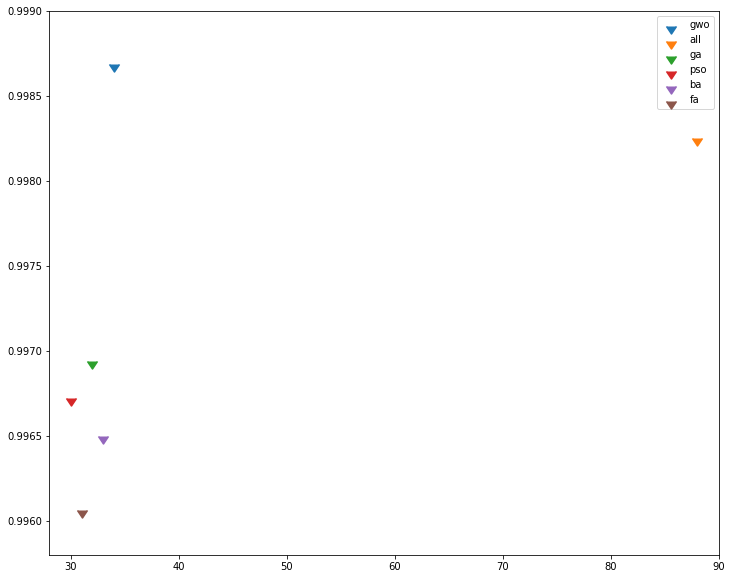

In [22]:
plt.rcParams["figure.figsize"] = (12,10)
plt.axis([28, 90, 0.9958, 0.9990])
for x, y, desc in all_scores_sorted_f1:
    plt.scatter(x, y, label=desc, marker=11, s=100)
plt.legend(loc='best')
plt.show()